In [67]:
import os
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import scipy.signal
import librosa
from scipy.fftpack import fft
from scipy import signal

In [121]:
inputDim = 2048
datalist = os.listdir('dataset/')

FG37_09.wav


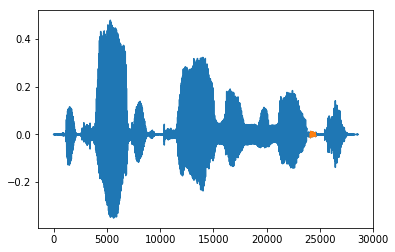

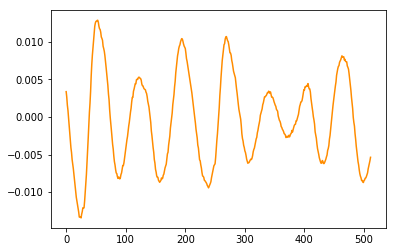

In [73]:
file = datalist[np.random.randint(0,len(datalist))]
print(file)

sr,wav = wavfile.read('dataset/'+file) 

plt.plot(np.arange(0,len(wav)),wav)

offset = np.random.randint(0,len(wav)-inputDim)
slot = wav[offset:offset+inputDim]


plt.plot(np.arange(offset,offset+inputDim),slot)

plt.figure()
plt.plot(np.arange(len(x)),slot,'darkorange')

28593


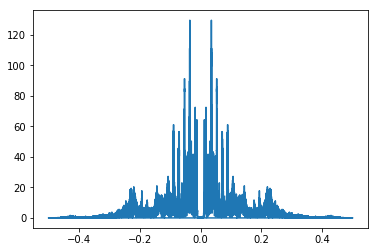

In [92]:
f = np.abs(fft(wav))
print(len(f))
freq = np.fft.fftfreq(len(f))
plt.plot(freq,f)

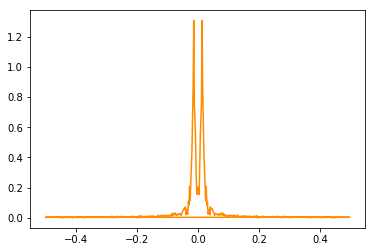

In [75]:
f = np.abs(fft(slot))
freq = np.fft.fftfreq(len(f))
plt.plot(freq,f,'darkorange')

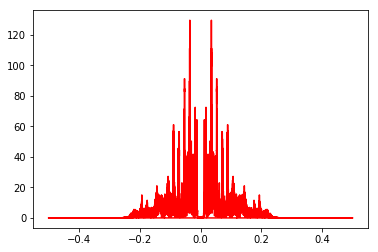

In [112]:
N = 10
Wn= 0.4

b,a = signal.butter(N,Wn,btype='low',output='ba') 

filtered = signal.lfilter(b,a,wav)

f = np.abs(fft(filtered))
freq = np.fft.fftfreq(len(f))
plt.plot(freq,f,'r')

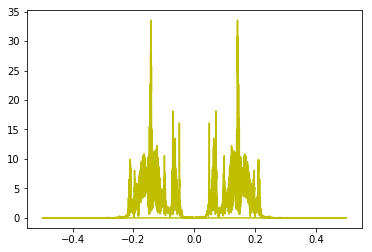

In [113]:
resampled = librosa.core.resample(wav,sr,4000)

filtered = signal.lfilter(b,a,resampled)

f = np.abs(fft(filtered))
freq = np.fft.fftfreq(len(f))
plt.plot(freq,f,'y')

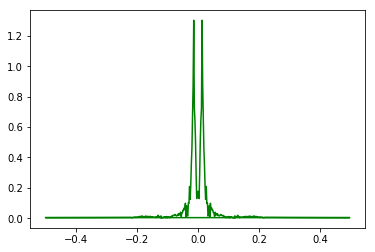

In [114]:
filtered = signal.lfilter(b,a,slot)

f = np.abs(fft(filtered))
freq = np.fft.fftfreq(len(f))
plt.plot(freq,f,'g')

(28593,)
28593


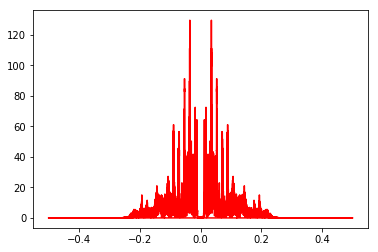

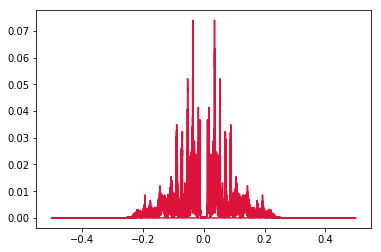

In [115]:
filtered = signal.lfilter(b,a,wav)

f = np.abs(fft(filtered))
print(f.shape)
freq = np.fft.fftfreq(len(f))
plt.plot(freq,f,'r')

normal = f / np.linalg.norm(f)
print(len(normal))
plt.figure()
plt.plot(freq,normal,'crimson')

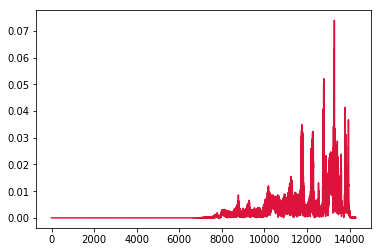

In [117]:
final = normal[len(normal)//2:]
plt.plot(np.arange(len(final)),final,'crimson')

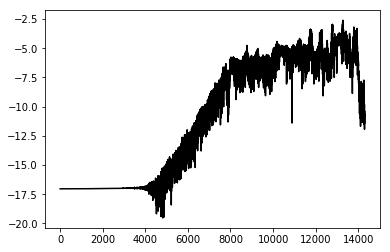

In [118]:
plt.plot(np.arange(len(final)),np.log(final),'k')

28593 6489


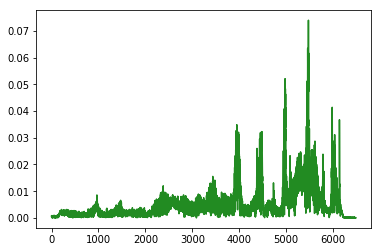

In [120]:
trimmed, index = librosa.effects.trim(final,26,frame_length=512, hop_length=128)
print(len(normal),len(trimmed))

plt.plot(np.arange(len(trimmed)),trimmed,'forestgreen')

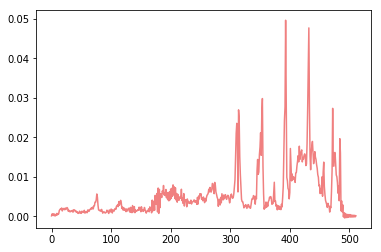

In [125]:
resampled = signal.resample(trimmed,512)

plt.plot(np.arange(len(resampled)),resampled,'lightcoral')

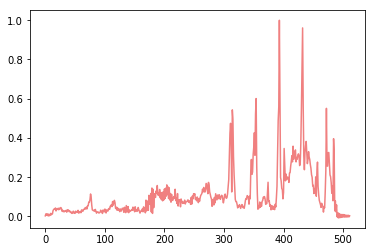

In [127]:
normalfinal = resampled / np.max(resampled)
plt.plot(np.arange(len(normalfinal)),normalfinal,'lightcoral')